In [1]:
# --- 第1步：导入工具 & 加载数据 ---
import pandas as pd

# 设置 Pandas 显示格式：只显示小数点后1位，不然数字太长看花了眼
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# 加载加州房价训练集
print("🏠 正在加载加州房价数据集...")
training_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

print("✅ 加载完成！")
# 先看一眼前 5 行，找找感觉
training_df.head()

🏠 正在加载加州房价数据集...
✅ 加载完成！


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [2]:
# --- 第2步：获取统计摘要 ---

# 这就是数据的“体检报告”
# count: 有多少行数据
# mean: 平均值
# std: 标准差 (数据波动大不大)
# min/max: 最小值/最大值
# 25%/50%/75%: 分位数 (比如 50% 就是中位数)
statistics = training_df.describe()

# 显示这个表格
statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


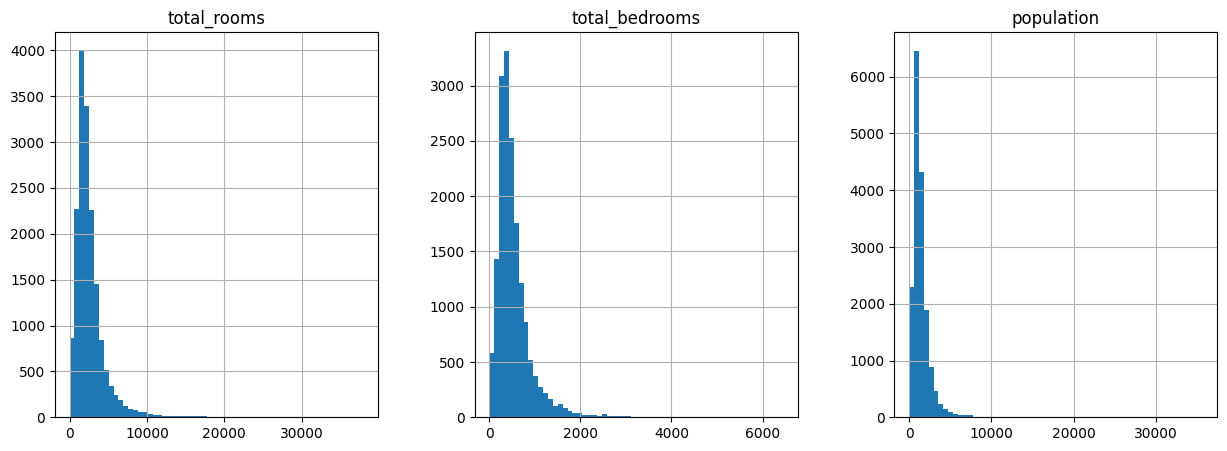

In [3]:
# --- 第3步：画图抓“鬼” ---
import matplotlib.pyplot as plt

# 我们选出那三个嫌疑最大的列
suspicious_cols = ['total_rooms', 'total_bedrooms', 'population']

# 画直方图
# bins=60: 把数据切成 60 份，看得细一点
# figsize=(15, 5): 图画宽一点，并排显示
training_df[suspicious_cols].hist(bins=60, figsize=(15, 5), layout=(1, 3))

plt.show()

🪄 施展 Log 魔法之后的样子：


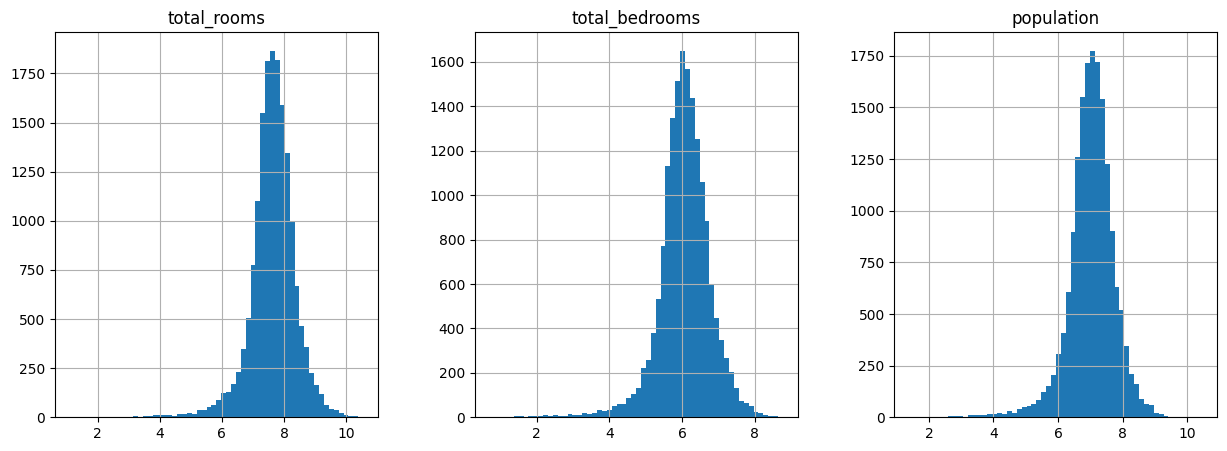

In [4]:
# --- 第4步：对数变换 (Log Scaling) ---
import numpy as np

# 定义一个辅助函数：先取对数，再画图
def log_and_plot(df, cols):
    # 1. 复制一份数据，防止改坏原始数据
    df_log = df[cols].copy()
    
    # 2. 核心魔法：取对数
    # 为什么要 +1？ 因为 log(0) 是无意义的(负无穷)，万一有空房子就崩了
    # 所以通常做法是 np.log(x + 1)
    for col in cols:
        df_log[col] = np.log(df_log[col] + 1)
        
    # 3. 再画一次图看看效果
    print("🪄 施展 Log 魔法之后的样子：")
    df_log.hist(bins=60, figsize=(15, 5), layout=(1, 3))
    plt.show()

# 对刚才那三个“嫌疑人”执行魔法
log_and_plot(training_df, suspicious_cols)

In [5]:
# --- 第5步：特征工程 (Feature Engineering) ---

# 我们把取过对数的数据，保存为新的列
# 命名习惯：加上 log_ 前缀，方便区分
training_df['log_rooms'] = np.log(training_df['total_rooms'] + 1)
training_df['log_bedrooms'] = np.log(training_df['total_bedrooms'] + 1)
training_df['log_population'] = np.log(training_df['population'] + 1)

print("✅ 新特征已创建：log_rooms, log_bedrooms, log_population")

# 看一眼新老特征的对比
training_df[['total_rooms', 'log_rooms']].head()

✅ 新特征已创建：log_rooms, log_bedrooms, log_population


,total_rooms,log_rooms
0,5612.0,8.6
1,7650.0,8.9
2,720.0,6.6
3,1501.0,7.3
4,1454.0,7.3


In [6]:
# --- 第6步：效果验证 (Correlation) ---

# 计算所有列与“房价”的相关性
correlations = training_df.corr()['median_house_value'].sort_values(ascending=False)

# 打印出来看看
print("📉 各个特征与房价的相关性排名：")
print(correlations)

📉 各个特征与房价的相关性排名：
median_house_value    1.0
median_income         0.7
log_rooms             0.2
total_rooms           0.1
housing_median_age    0.1
                     ... 
total_bedrooms        0.0
log_population       -0.0
population           -0.0
longitude            -0.0
latitude             -0.1
Name: median_house_value, Length: 12, dtype: float64


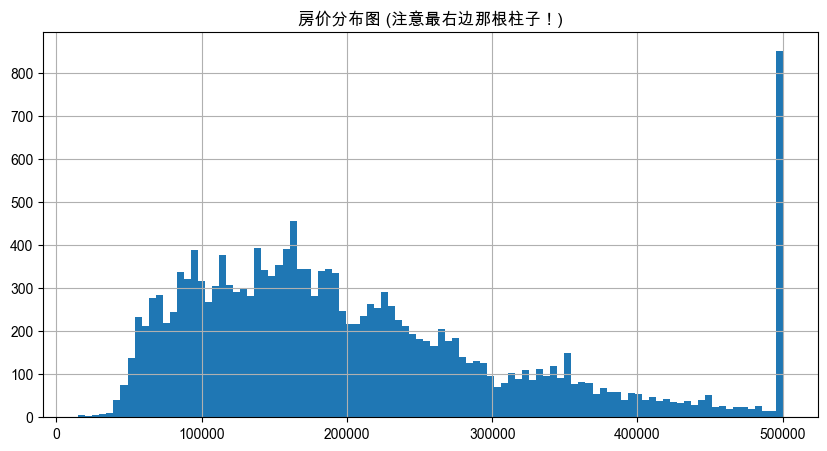

In [8]:
# --- 第7步：检查目标值 (中文修复版) ---
import matplotlib.pyplot as plt

# 🍎 Mac 专属中文修复补丁
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 

# 再画一次
training_df['median_house_value'].hist(bins=100, figsize=(10, 5))
plt.title("房价分布图 (注意最右边那根柱子！)")
plt.show()

⚠️ 发现 814 条被截断的异常数据，准备删除...
✅ 清洗完成！原数据 17000 条 -> 现数据 16186 条


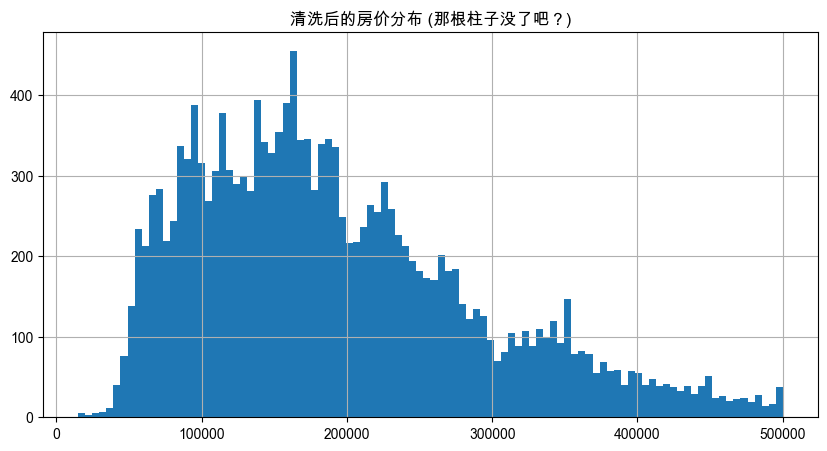

In [9]:
# --- 第8步：清洗数据 (Drop Outliers) ---

# 1. 看看有多少房子是“正好 500,001”的 (数据集里通常用 500001 代表上限)
limit_value = 500001
num_bad_data = training_df[training_df['median_house_value'] >= limit_value].shape[0]

print(f"⚠️ 发现 {num_bad_data} 条被截断的异常数据，准备删除...")

# 2. 只保留那些价格小于上限的房子
clean_df = training_df[training_df['median_house_value'] < limit_value]

print(f"✅ 清洗完成！原数据 {len(training_df)} 条 -> 现数据 {len(clean_df)} 条")

# 3. 再画一次图验证一下
clean_df['median_house_value'].hist(bins=100, figsize=(10, 5))
plt.title("清洗后的房价分布 (那根柱子没了吧？)")
plt.show()